# Fits a model for CMB for a given temperature

User inputs a temperature, the error between the model generated and the observed data is calculated.

Needed to get Jupyter to display graphs properly

In [20]:
%matplotlib inline

Some imports

In [21]:
import numpy as np
#from numpy import array
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

Some physical constants

In [22]:
_h=6.626E-34 #Planck
_c=2.998E8 #Speed of light
_k=1.381E-23 #Boltzmann

### Function
Returns the radiation intensity from the wavelength and temperature
using the formula given in the notes.


In [23]:
def intensity(wavelength, T):
  a=(2*_h*(_c**2))/(wavelength**5)
  b = (_h*_c)/(wavelength*_k*T)
  c=(np.exp(b)-1)**-1
  return a*c

### Function 
Returns the root mean squared error between the observed data and model predictions

In [24]:
def calculate_rms(measured_lambda_metres, measured_intensity, T):
  model_intensity=intensity(measured_lambda_metres, T)
  sq_dev=(measured_intensity-model_intensity)**2
  mean_sum=sum(sq_dev)/len(sq_dev)
  return mean_sum**0.5

Observed data. I the real world we'd probably be reading this in from a data file of some sort and need to do some cleaning. 

In [25]:
measured_lambda=np.array([4.405286344,3.676470588,3.144654088,\
2.754820937,2.450980392,2.004008016,1.834862385,1.377410468,\
0.881834215,0.468823254],float)

# Measured data: intensity in W m**-2 m**-1 sr**-1
measured_intensity=np.array([3.10085E-05,5.53419E-05,8.8836E-05,\
0.000129483,0.000176707,0.000284786,0.00034148,0.000531378,\
0.000561909,6.16936E-05],float)

measured_lambda_metres=measured_lambda*1e-3 #converts wavelengths to metres.

Sets up a range of values to use in the model

In [26]:
# Define the wavelength range in millimetres
model_lambda_range=np.linspace(0.1,5.0,500,endpoint=True)
# convert to metres
model_lambda_range_metres=model_lambda_range*1e-3

### Here is it where it all happens.
You'll need to input a temperature - try between 0 and 10 to start with.  There's no error checking implemented  soif you put in anything that's not a number it'll just fall over.

In [27]:
# Initialise a couple of lists to hold data.  This is a bit cumbersome try reactoring.
errors=[]
temps=[]

temp=float(input("Please enter a value for T")) #asks user for a temp

# main program loop
while True:
  model_intensity=intensity(model_lambda_range_metres,temp)
  rms=calculate_rms(measured_lambda_metres, measured_intensity, temp)
  errors.append(rms) #builds a list of errors
  temps.append(temp) #and associated temperatures
  best_so_far=temps[errors.index(min(errors))] #finds the temp associated with the smallest error
  #outputs
  print("")
  print(f"Error (*1e5) is {round(rms*1e5,2)}" '\n')
  print(f"Smallest error so far is {round((min(errors)*1e5),2)} for a temperature of {best_so_far} K" '\n')
  # go round again or stop and finish up
  go_again=input("Enter another temperature or type q to finish")
  if go_again=="q":
    break
  else:
    temp=float(go_again)

Please enter a value for T2.7

Error (*1e5) is 1.17

Smallest error so far is 1.17 for a temperature of 2.7 K

Enter another temperature or type q to finishq


Plots the graphs (tbh I've forgotten how this works)

<Figure size 432x288 with 0 Axes>

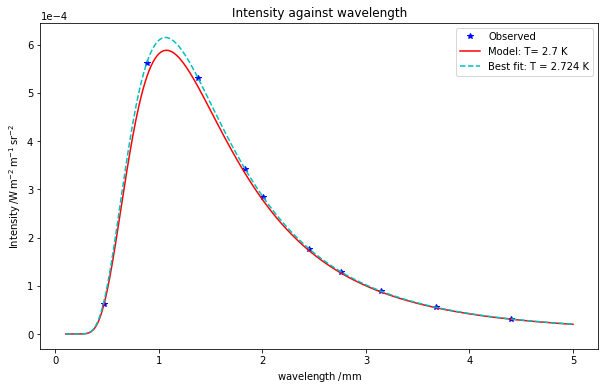

In [28]:
best_temp=intensity(model_lambda_range_metres,2.724) #The best fit temp as given
    
# pyplot stuff
plt.clf() 
fig= plt.figure(figsize=(10,6))
plt.title("Intensity against wavelength")
plt.xlabel(r'$\mathrm{wavelength\;/mm}$')
#plt.xlabel(r'$s(t) = \mathcal{A}\mathrm{sin}(2 \omega t)$')
plt.ylabel(r'$\mathrm{Intensity\,/W\,m^{-2}\,m^{-1}\,sr^{-2}}$') #LaTeX for axes labels, yay!
plt.ticklabel_format(axis="y", style="sci", useOffset= True, scilimits=(0.01,1000))
plt.plot(measured_lambda,measured_intensity,'b*', label="Observed")
plt.plot(model_lambda_range,model_intensity,'r', label="Model: T= "+ str(temp)+" K")
plt.plot(model_lambda_range,best_temp,'c--', label="Best fit: T = 2.724 K")
plt.legend()
plt.show()

Everything else here was in addition to the original exercise requirements and done for fun.

### Implements a 'brute force' algorithm for finding the temp that gives a minimum error.
Works on this fairly small range but not really satisfactory. NB using numpy arrays gives a much faster speed than standard python lists but it still slows down pretty rapidly once we require any more than the accuracy or range we have here.

Python has a wide range of libraries or doing optimization but they were a bit beyond me at this point.

In [29]:
temp_range=np.linspace(1,5,10000,endpoint=True)
error_array= np.array([])
    
for temperature in temp_range:
  t=calculate_rms(measured_lambda_metres, measured_intensity, temperature)
  error_array=np.append(error_array,t)
  
# Finds the smallest error in the error array and uses its index to return 
# the associated temp from the temp_range array
minimising_temp=temp_range[np.where(error_array==np.min(error_array))][0]

print(f"Your estimate for the temperature was {temp} K with an error of {round((errors[-1]*1e5),3)}")
print(f"The calculated temperature that gives the best fit to the obsered data is {round(minimising_temp,3)} K (4 s.f.)\
 with an error of {np.format_float_scientific(np.min(error_array),precision=2)} ")

#with an error of {round(np.min(error_array)*1e5,3)}") #alternatively

Your estimate for the temperature was 2.7 K with an error of 1.171
The calculated temperature that gives the best fit to the obsered data is 2.724 K (4 s.f.) with an error of 1.83e-06 


### Plots graphs of error and likelihood for no real reason :)

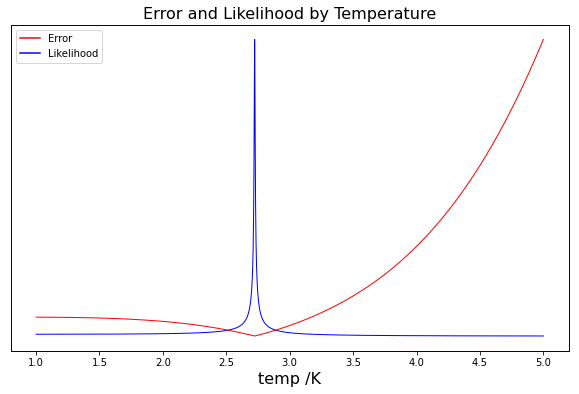

In [30]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_title("Error and Likelihood by Temperature", fontsize=16)
ax1.set_xlabel("temp /K", fontsize=16)
ax1.set_yticks([])
ax1.plot(temp_range,error_array**-1, lw=1, color="blue", label="Error");
#ax1.set_ylabel(r"Likelihood", fontsize=16, color="blue")
for label in ax1.get_yticklabels():
 label.set_color("blue")

ax2 = ax1.twinx()
ax2.plot(temp_range,error_array, lw=1, color="red", label="Likelihood");
#ax2.set_ylabel(r"Error", fontsize=16, color="red")
ax2.set_yticks([])
#plt.legend([ax1, ax2], ['Line Up', 'Line Down'])
for label in ax2.get_yticklabels():
 label.set_color("red")

err_line=mlines.Line2D([],[], ls="-", color='red', label="Error")
like_line=mlines.Line2D([],[], ls="-", color='blue', label="Likelihood")
plt.legend(handles=[err_line, like_line])
